In [1]:
import requests
import numpy as np
import pandas as pd
import time
import random
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from selenium import webdriver
from tqdm import tqdm_notebook
import socks
import socket
import math
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [6]:
browser=webdriver.Firefox()

In [23]:
id_films = []
sleep_time = 10.0
#51 страница
def getIdFilms(soup):
    ids = []
    ids = [d[0].attrs['href'] for d in 
                     [m.findAll(lambda tag: tag.name == 'a') for m in 
                      [x for x in soup.findAll(lambda tag: tag.name == 'div' and 
                                            tag.get('class') == ['poster'])]]]
    return ids

for page_number in tqdm_notebook([i for i in range(1,52)]):
    time.sleep(sleep_time)
    page_link = 'https://www.kinopoisk.ru/top/navigator/m_act[num_vote]/2530/m_act[rating]/1%3A/m_act[is_film]/on/order/rating/page/{}/perpage/200/#results'.format(page_number)
    browser.get(page_link)
    soup=BeautifulSoup(browser.page_source,'html.parser')
    id_films.extend(getIdFilms(soup))

  0%|          | 0/51 [00:00<?, ?it/s]

In [40]:
len(id_films)

10063

In [25]:
id_films[-10:]

['/level/1/film/434971/',
 '/level/1/film/692526/',
 '/level/1/film/276135/',
 '/level/1/film/644717/',
 '/level/1/film/464941/',
 '/level/1/film/882285/',
 '/level/1/film/222210/',
 '/level/1/film/592275/',
 '/level/1/film/408915/',
 '/level/1/film/676870/']

In [45]:
id_films_new = [x.replace('/level/1','') for x in id_films]

In [46]:
id_films_new[-10:]

['/film/434971/',
 '/film/692526/',
 '/film/276135/',
 '/film/644717/',
 '/film/464941/',
 '/film/882285/',
 '/film/222210/',
 '/film/592275/',
 '/film/408915/',
 '/film/676870/']

In [35]:
dataFile = open('id_films_1.txt')
old_id_films = []
for line in dataFile:
    old_id_films.append(line.replace('\n',''))

In [36]:
old_id_films[-10:]

['/film/8161/',
 '/film/8125/',
 '/film/966036/',
 '/film/251733/',
 '/film/89515/',
 '/film/279850/',
 '/film/258328/',
 '/film/505851/',
 '/film/929348/',
 '/film/885317/']

In [48]:
count = 0
for x in old_id_films:
    if x in id_films_new:
        count += 1
print(count)

1090


ранее уже руками собирались id фильмов, которые были сохранены в отдельный файл и чтобы не было повторений нужно было исключить те фильмы которые уже парсились.

In [49]:
for x in old_id_films:
    if x in id_films_new:
        id_films_new.remove(x)

In [51]:
len(id_films_new)

8973

In [53]:
with open('id_films_2.txt', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(id_films_new))

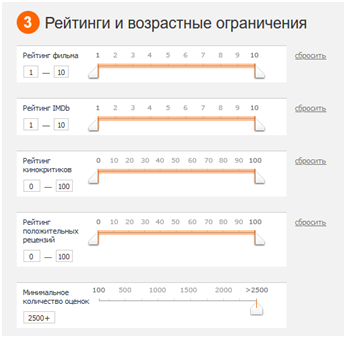

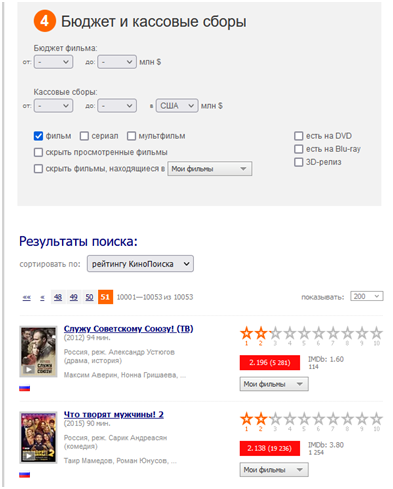